In [2]:
# 1. Importy
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Połączenie z SQL Server i wczytanie danych
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=LAPTOP-MK318FJT\\TAB;'
    'DATABASE=pogodynka;'
    'Trusted_Connection=yes;'
)

query = "SELECT * FROM dbo.pogodynka_zbilansowana"
df = pd.read_sql(query, conn)

# 3. Wstępny podgląd
print(df.shape)
print(df.columns)
df.head()


C:\Users\Rafal Karpowicz\AppData\Local\Temp\ipykernel_34808\2936758681.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


(49883, 36)
Index(['iddepeszy', 'WysokoscPodstChmur', 'Widzialnosc',
       'WielkoscZachmurzenia', 'TemperaturaPowietrza', 'DeficytPktRosy',
       'Deltatemp', 'DeltaRosy', 'CisnienieNaPoziomieMorza',
       'WielkoscTendencjiCisnienia', 'WskChmurowy', 'ZjawiskaPop', 'Kategoria',
       'Opad', 'OtoczenieN_M', 'OtoczenieS_M', 'OtoczenieE_M', 'OtoczenieW_M',
       'OtoczenieN_B', 'OtoczenieS_B', 'OtoczenieE_B', 'OtoczenieW_B',
       'OtoczenieN_P', 'OtoczenieS_P', 'OtoczenieE_P', 'OtoczenieW_P',
       'OtoczenieN_O', 'OtoczenieS_O', 'OtoczenieE_O', 'OtoczenieW_O',
       'WiatrN', 'WiatrS', 'WiatrE', 'WiatrW', 'miesiac', 'godzina'],
      dtype='object')


,iddepeszy,WysokoscPodstChmur,Widzialnosc,WielkoscZachmurzenia,TemperaturaPowietrza,DeficytPktRosy,Deltatemp,DeltaRosy,CisnienieNaPoziomieMorza,WielkoscTendencjiCisnienia,...,OtoczenieN_O,OtoczenieS_O,OtoczenieE_O,OtoczenieW_O,WiatrN,WiatrS,WiatrE,WiatrW,miesiac,godzina
0,1548522,9.999,20.0,0,18.8,1.5,-0.8,0.0,10.174,0.4,...,0,0,0,0,7.57,0.00,9.26,0.00,8,"4,55"
1,5016038,9.999,10.0,7,17.4,1.1,-3.6,-4.6,10.135,1.2,...,1,0,1,0,0.00,0.00,0.00,0.00,8,"4,56"
2,6248573,9.999,15.0,6,13.7,0.8,-1.8,-1.5,10.135,0.1,...,1,0,1,0,0.00,5.62,2.47,0.94,8,"4,57"
3,6261067,9.999,7.0,4,11.8,0.5,-0.2,-0.4,10.125,0.1,...,0,0,0,0,0.00,0.00,0.00,0.00,8,"4,58"
4,984568,9.999,15.0,5,14.3,2.3,-2.4,-1.2,10.132,0.2,...,0,0,0,0,0.52,2.18,7.43,0.00,8,"4,59"


In [5]:
print(df.columns.tolist())


['iddepeszy', 'WysokoscPodstChmur', 'Widzialnosc', 'WielkoscZachmurzenia', 'TemperaturaPowietrza', 'DeficytPktRosy', 'Deltatemp', 'DeltaRosy', 'CisnienieNaPoziomieMorza', 'WielkoscTendencjiCisnienia', 'WskChmurowy', 'ZjawiskaPop', 'Kategoria', 'Opad', 'OtoczenieN_M', 'OtoczenieS_M', 'OtoczenieE_M', 'OtoczenieW_M', 'OtoczenieN_B', 'OtoczenieS_B', 'OtoczenieE_B', 'OtoczenieW_B', 'OtoczenieN_P', 'OtoczenieS_P', 'OtoczenieE_P', 'OtoczenieW_P', 'OtoczenieN_O', 'OtoczenieS_O', 'OtoczenieE_O', 'OtoczenieW_O', 'WiatrN', 'WiatrS', 'WiatrE', 'WiatrW', 'miesiac', 'godzina']


In [6]:
features = [
    'TemperaturaPowietrza',
    'CisnienieNaPoziomieMorza',
    'WielkoscZachmurzenia',
    'DeficytPktRosy',
    'Widzialnosc',
    'WysokoscPodstChmur',
    'DeltaRosy',
    'Deltatemp'  # ✔️ tak jest w danych, nie "DeltaTemp"
]

target = 'Opad'


In [7]:
X = df[features]
y = df[target]


# Czy będzie padać

In [11]:
# 1.1 Tworzymy zmienną binarną: 1 = opad wystąpił, 0 = brak opadu
df['Opad_binarny'] = df['Opad'].apply(lambda x: 1 if x > 0 else 0)

# 1.2 Lista cech (features) – dopasuj do swoich kolumn
features = [
    'TemperaturaPowietrza',
    'CisnienieNaPoziomieMorza',
    'WielkoscZachmurzenia',
    'DeficytPktRosy',
    'Widzialnosc',
    'WysokoscPodstChmur',
    'DeltaRosy',
    'Deltatemp'
]

target = 'Opad_binarny'


In [12]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.837821583695289

Confusion Matrix:
 [[10513   599]
 [ 1828  2025]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90     11112
           1       0.77      0.53      0.63      3853

    accuracy                           0.84     14965
   macro avg       0.81      0.74      0.76     14965
weighted avg       0.83      0.84      0.83     14965



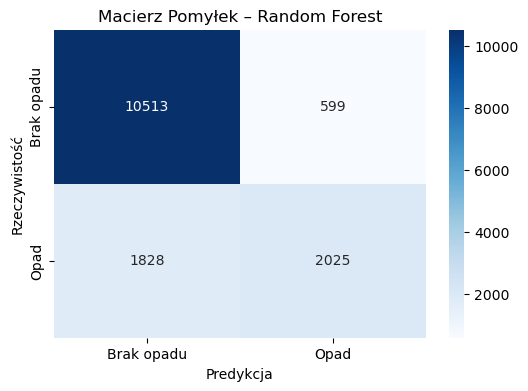

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Macierz pomyłek
cm = confusion_matrix(y_test, y_pred)

# Rysowanie
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Brak opadu', 'Opad'], yticklabels=['Brak opadu', 'Opad'])
plt.xlabel('Predykcja')
plt.ylabel('Rzeczywistość')
plt.title('Macierz Pomyłek – Random Forest')
plt.show()


C:\Users\Rafal Karpowicz\AppData\Local\Temp\ipykernel_34808\3600844584.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")


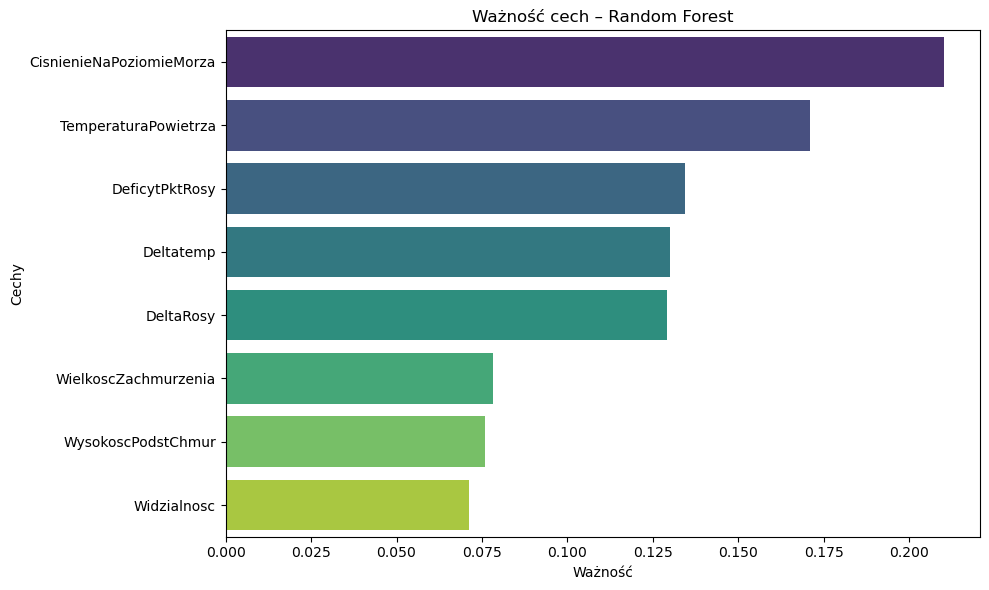

In [17]:
# Oblicz ważność cech
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Posortuj cechy według ważności
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Wykres
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")
plt.title('Ważność cech – Random Forest')
plt.xlabel('Ważność')
plt.ylabel('Cechy')
plt.tight_layout()
plt.show()



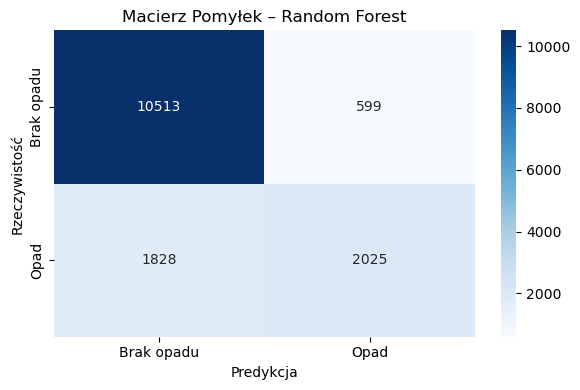

In [20]:
# Macierz pomyłek - zapis do pliku
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Brak opadu', 'Opad'],
            yticklabels=['Brak opadu', 'Opad'])
plt.xlabel('Predykcja')
plt.ylabel('Rzeczywistość')
plt.title('Macierz Pomyłek – Random Forest')
plt.tight_layout()
plt.savefig("C:\ML-danych-pogodowych/images/macierz_pomylek_rf.png", dpi=300)
plt.show()


C:\Users\Rafal Karpowicz\AppData\Local\Temp\ipykernel_34808\2863638124.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")


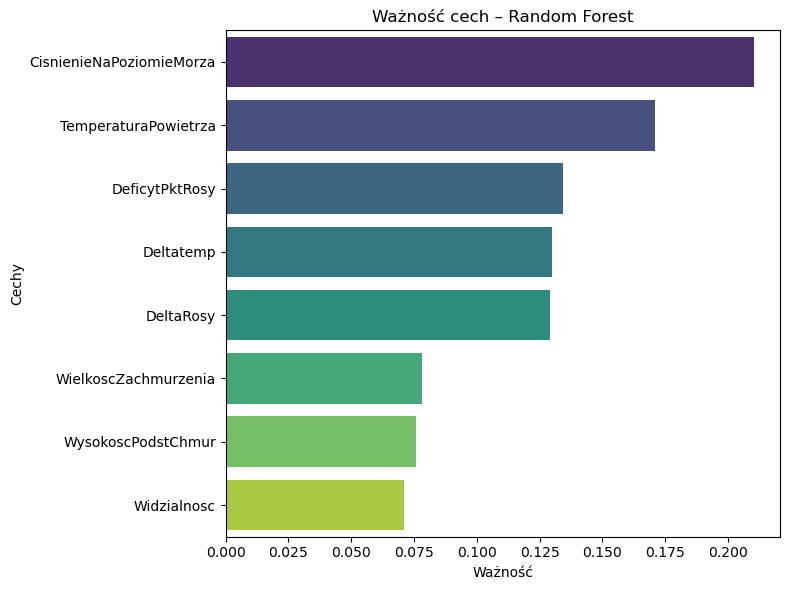

In [21]:
# Ważność cech - zapis do pliku
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_imp = feat_imp.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")
plt.title("Ważność cech – Random Forest")
plt.xlabel("Ważność")
plt.ylabel("Cechy")
plt.tight_layout()
plt.savefig("C:\ML-danych-pogodowych/images//waznosc_cech_rf.png", dpi=300)
plt.show()
